Función para mostrar la matriz de confusión y las métricas

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
import random
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

In [ ]:
def plot_matriz_confusion(axes,TP=0,TN=0,FP=0,FN=0,fontsize=15,vpp=None,vpn=None,sensibilidad=None,especificidad=None,f1_score=None,mcc=None,auc=None,prevalencia=None):
    success_color=matplotlib.colors.to_rgb('#9EE548')
    failure_color=matplotlib.colors.to_rgb("#C32240")
    blanco_color=matplotlib.colors.to_rgb("#FFFFFF")


    if ((vpp is not None) |
        (vpn is not None) |
        (sensibilidad is not None) |
        (especificidad is not None) |
        (prevalencia is not None) |
        (f1_score is not None) |
        (mcc is not None) |
        (auc is not None) ):
        show_metrics=True
    else:
        show_metrics=False


    if show_metrics==False:
        axes.imshow([[success_color,failure_color],[failure_color,success_color]])
    else:
        axes.imshow([[success_color,failure_color,blanco_color],[failure_color,success_color,blanco_color],[blanco_color,blanco_color,blanco_color]])



    labels = ['Positivo','Negativo']
    xaxis = np.arange(len(labels))
    axes.set_xticks(xaxis)
    axes.set_yticks(xaxis)
    axes.set_xticklabels(labels, fontsize=13, color="#003B80")
    axes.set_yticklabels(labels, fontsize=13, color="#003B80")
    axes.text(0, 0, str(TP)+" TP",ha="center", va="center", color="#0A2102",fontsize=fontsize)
    axes.text(0, 1, str(FP)+" FP",ha="center", va="center", color="#FAEAEA",fontsize=fontsize)
    axes.text(1, 0, str(FN)+" FN",ha="center", va="center", color="#FAEAEA",fontsize=fontsize)
    axes.text(1, 1, str(TN)+" TN",ha="center", va="center", color="#0A2102",fontsize=fontsize)
    axes.xaxis.tick_top()
    axes.set_xlabel('Predicción', fontsize=fontsize, color="#003B80")
    axes.xaxis.set_label_position('top')
    axes.set_ylabel('Realidad', fontsize=fontsize, color="#003B80")


    if show_metrics==True:


        if (vpp is not None):
            axes.text(0, 2, f"Precision\n{vpp:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4)
        if (vpn is not None):
            axes.text(1, 2, f"VPN\n{vpn:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4)
        if (sensibilidad is not None):
            axes.text(2, 0, f"Sensibilidad\n{sensibilidad:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4)
        if (especificidad is not None):
            axes.text(2, 1, f"Especificidad\n{especificidad:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4)

        metricas_generales=""
        if (prevalencia is not None):
            metricas_generales=metricas_generales+f"Prevalencia\n{prevalencia:.2f}\n"
        if (f1_score is not None):
            metricas_generales=metricas_generales+f"F1-score\n{f1_score:.2f}\n"
        if (mcc is not None):
            metricas_generales=metricas_generales+f"MCC\n{mcc:.2f}\n"
        if (auc is not None):
            metricas_generales=metricas_generales+f"AUC\n{auc:.2f}"

        axes.text(2, 2, metricas_generales,ha="center", va="center", color="#0A2102",fontsize=fontsize-4)


Ejemplo de uso

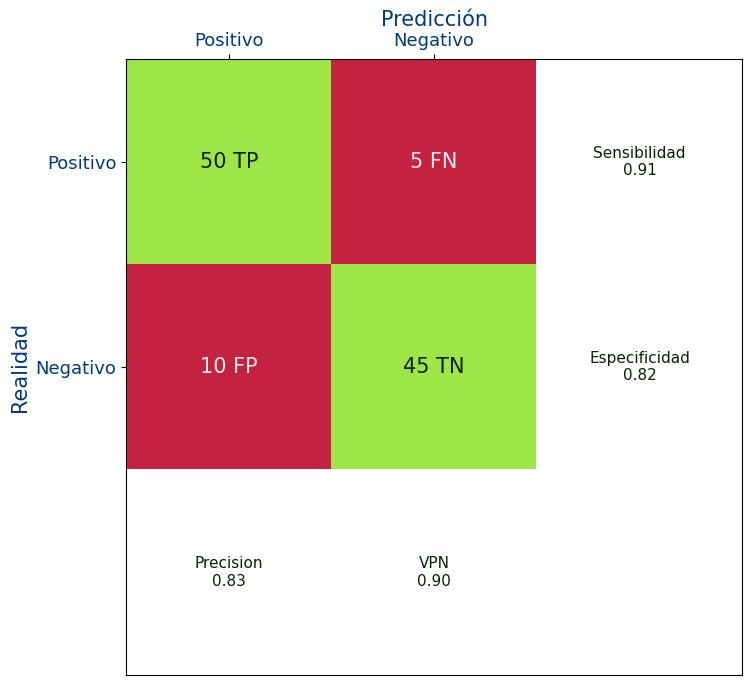

In [ ]:
# Crear una figura y un objeto de ejes
fig, ax = plt.subplots(figsize=(8, 8))  # Configura el tamaño de la figura

# Llamar a la función pasando el objeto `ax` como `axes`
plot_matriz_confusion(
    axes=ax,
    TP=50, TN=45, FP=10, FN=5,
    fontsize=15,
    vpp=0.83, vpn=0.90,
    sensibilidad=0.91, especificidad=0.82
)

# Mostrar el gráfico
plt.show()


Código para comparar dos métricas para un modelo de forma gráfica

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


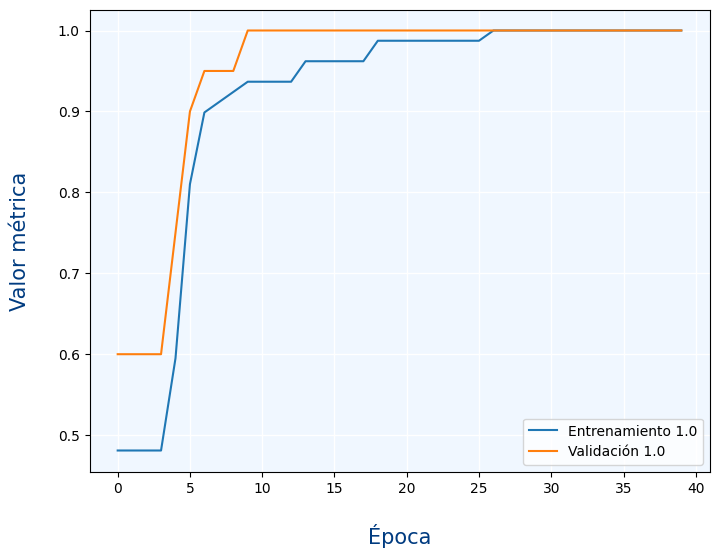

In [ ]:

iris=load_iris()
x=iris.data[0:99,2]
y_true=iris.target[0:99]

np.random.seed(5)
tf.random.set_seed(5)
random.seed(5)

x_train, x_test, y_train, y_test = train_test_split(x, y_true, test_size=0.2, random_state=42)

model=Sequential()
model.add(Dense(3, input_dim=1,activation="sigmoid",kernel_initializer="glorot_normal"))
model.add(Dense(1,activation="sigmoid",kernel_initializer="glorot_normal"))
model.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["binary_accuracy"])
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=40,verbose=False)

figure=plt.figure(figsize=(8,6))
axes = figure.add_subplot()

axes.plot(history.history['binary_accuracy'],label="Entrenamiento "+str(history.history['binary_accuracy'][-1]))
axes.plot(history.history['val_binary_accuracy'],label="Validación "+str(history.history['val_binary_accuracy'][-1]))

axes.legend()
axes.set_xlabel('Época', fontsize=15,labelpad=20,color="#003B80")
axes.set_ylabel('Valor métrica', fontsize=15,labelpad=20,color="#003B80")
axes.set_facecolor("#F0F7FF")
axes.grid(visible=True,which='major', axis='both',color="#FFFFFF",linewidth=1)

Código para guardar un modelo en un archivo

In [ ]:
iris=load_iris()

sepal_length=iris.data[0:99,0]
petal_length=iris.data[0:99,2]
flower_type=iris.target[0:99]

x=np.column_stack((sepal_length,petal_length))
y=flower_type


np.random.seed(5)
tf.random.set_seed(5)
random.seed(5)

# Dividimos los datos en conjuntos de entrenamiento (80%) y prueba (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Inicializamos el generador de números para tener resultados reproducibles
np.random.seed(5)
tf.random.set_seed(5)
random.seed(5)

#Creamos el modelo (uno más pequeño que el anterior)
model=Sequential()
model.add(Dense(6, activation='relu',input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy')


model.fit(x_train, y_train,epochs=40) # El batch_size por defecto es 32

model.save('my_red_neuronal.keras')

Epoch 1/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 2.2146 
Epoch 2/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1229
Epoch 3/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.0634
Epoch 4/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.0134
Epoch 5/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.9683
Epoch 6/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.9261
Epoch 7/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.8860
Epoch 8/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.8473 
Epoch 9/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.8098
Epoch 10/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.7731
Epoch 11/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.7372
Epoch 12/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.7019
Epoch 13/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.6672
Epoch 14/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.6331 
Epoch 15/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.5994
Epoch 16/40
3/3 ━━━━━━━━━━━━━━━

Código para cargar un modelo desde un archivo

In [ ]:
model=tf.keras.models.load_model('my_red_neuronal.keras')

Creación de la métrica specificity

In [ ]:
import tensorflow as tf

class Specificity(tf.keras.metrics.Metric):
    def __init__(self, name="specificity", threshold=0.5, **kwargs):
        """
        Parámetros:
          - name: nombre de la métrica (aparece en logs).
          - threshold: umbral para convertir probabilidades en etiquetas {0,1}.
        """
        super().__init__(name=name, **kwargs)
        self.threshold = threshold
        # Pesos acumulados (escalares) para true negatives y false positives
        self.tn = self.add_weight(name="tn", initializer="zeros")
        self.fp = self.add_weight(name="fp", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        """
        Se llama cada batch durante entrenamiento/validación.
        Debe:
          1. Preparar y_true y y_pred (misma forma, tipo float).
          2. Calcular máscaras por muestra para TN y FP.
          3. Aplicar sample_weight si existe (por muestra).
          4. Reducir (sumar) y actualizar los acumuladores.
        """

        # 1) Aplanar tensores a vectores 1-D para evitar problemas de broadcasting
        y_true = tf.reshape(y_true, [-1])
        y_pred = tf.reshape(y_pred, [-1])

        # 2) Asegurarnos del tipo float (facilita operaciones)
        y_true = tf.cast(y_true, tf.float32)

        # 3) Convertir predicciones a etiquetas binarias según umbral.
        y_pred_labels = tf.cast(y_pred >= self.threshold, tf.float32)

        # 4) Crear máscaras por muestra:
        #    tn_mask = 1 para muestras que son TN (y_true==0 y y_pred==0), 0 en otro caso
        #    fp_mask = 1 para muestras que son FP (y_true==0 y y_pred==1), 0 en otro caso
        tn_mask = (1.0 - y_true) * (1.0 - y_pred_labels)
        fp_mask = (1.0 - y_true) * y_pred_labels

        # 5) Si hay sample_weight (por ejemplo class_weight), aplicarlo por elemento.
        #    sample_weight puede ser un escalar o un vector por muestra.
        if sample_weight is not None:
            sample_weight = tf.cast(tf.reshape(sample_weight, [-1]), tf.float32)
            tn_mask = tn_mask * sample_weight
            fp_mask = fp_mask * sample_weight

        # 6) Sumar las máscaras para obtener TN y FP del batch
        tn = tf.reduce_sum(tn_mask)
        fp = tf.reduce_sum(fp_mask)

        # 7) Actualizar los acumuladores globales (se usan en result())
        self.tn.assign_add(tn)
        self.fp.assign_add(fp)

    def result(self):
        """
        Retorna la especificidad acumulada:
            specificity = TN / (TN + FP)
        divide_no_nan evita NaN si el denominador es 0 (devuelve 0 en ese caso).
        """
        denom = self.tn + self.fp
        return tf.math.divide_no_nan(self.tn, denom)

    def reset_states(self):
        """
        Reinicia los contadores (llamado al inicio de cada epoch).
        """
        self.tn.assign(0.0)
        self.fp.assign(0.0)


Cómo llamarla al mismo tiempo que la sensibilidad

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['recall', Specificity(threshold=0.5)])

In [ ]:
model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=40)

Epoch 1/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - loss: 0.8785 - recall: 1.0000 - specificity: 0.0000e+00 - val_loss: 1.1255 - val_recall: 1.0000 - val_specificity: 0.0000e+00
Epoch 2/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.8762 - recall: 1.0000 - specificity: 0.0000e+00 - val_loss: 1.1223 - val_recall: 1.0000 - val_specificity: 0.0000e+00
Epoch 3/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.8740 - recall: 1.0000 - specificity: 0.0000e+00 - val_loss: 1.1192 - val_recall: 1.0000 - val_specificity: 0.0000e+00
Epoch 4/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.8718 - recall: 1.0000 - specificity: 0.0000e+00 - val_loss: 1.1161 - val_recall: 1.0000 - val_specificity: 0.0000e+00
Epoch 5/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.8696 - recall: 1.0000 - specificity: 0.0000e+00 - val_loss: 1.1130 - val_recall: 1.0000 - val_specificity: 0.0000e+00
Epoch 6/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.8674 - recall: 1.0000 - specificity: 0.0000e+00 - val_l

Función para calcular la matriz de confusión de un modelo de forma menos gráfica

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = (model.predict(x_test) > 0.5).astype(int)
print(confusion_matrix(y_true, y_pred))
TP, FP, FN, TN = confusion_matrix(y_true, y_pred).ravel().tolist()
print('TP:',TP)
print('FP:',FP)
print('FN:',FN)
print('TN:',TN)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[ 0 12]
 [ 0  8]]
TP: 0
FP: 12
FN: 0
TN: 8


Uso de la función gráfica

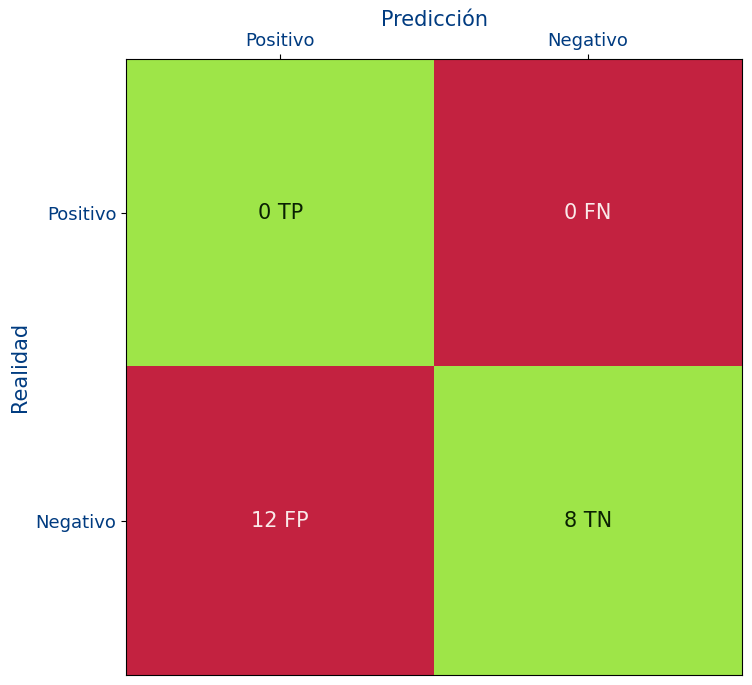

In [ ]:
# Crear una figura y un objeto de ejes
fig, ax = plt.subplots(figsize=(8, 8))  # Configura el tamaño de la figura

# Llamar a la función pasando el objeto `ax` como `axes`
plot_matriz_confusion(
    axes=ax,
    TP=TP, TN=TN, FP=FP, FN=FN,
    fontsize=15,
)
# Mostrar el gráfico
plt.show()

**Ejemplo de uso del SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(x_train, y_train)

print("Antes de SMOTE:", np.bincount(y_train))
print("Después de SMOTE:", np.bincount(y_train_res))


Antes de SMOTE: [38 41]
Después de SMOTE: [41 41]
